<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



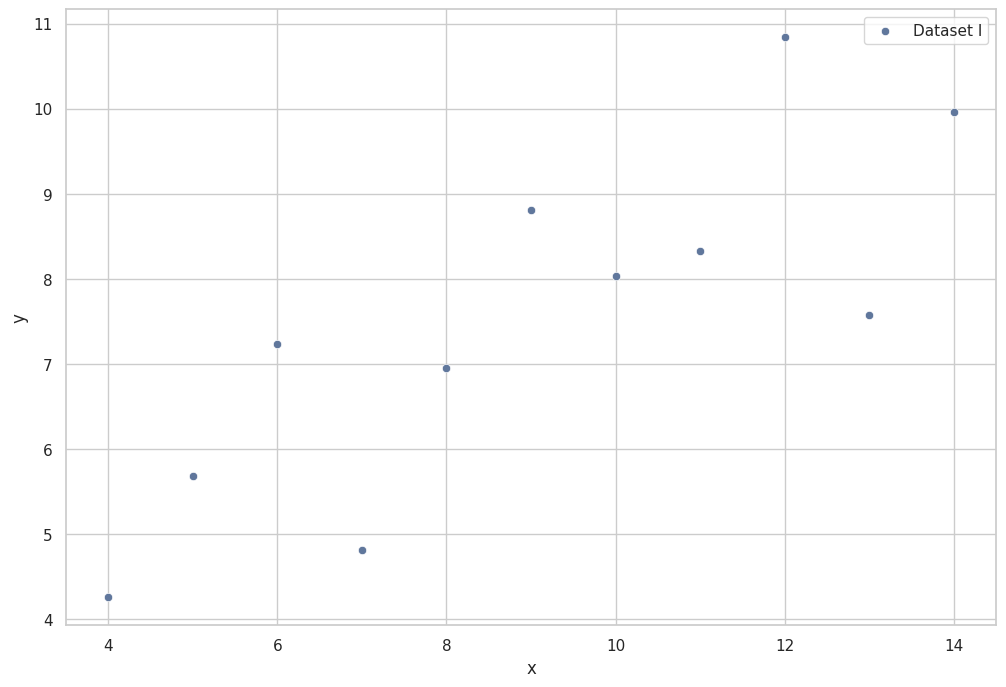

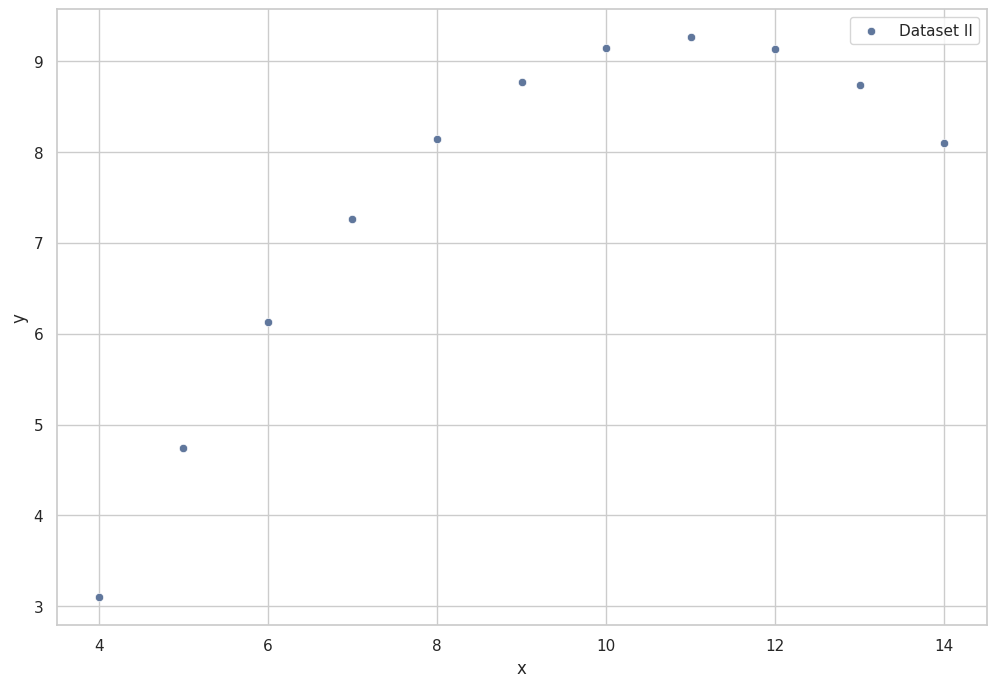

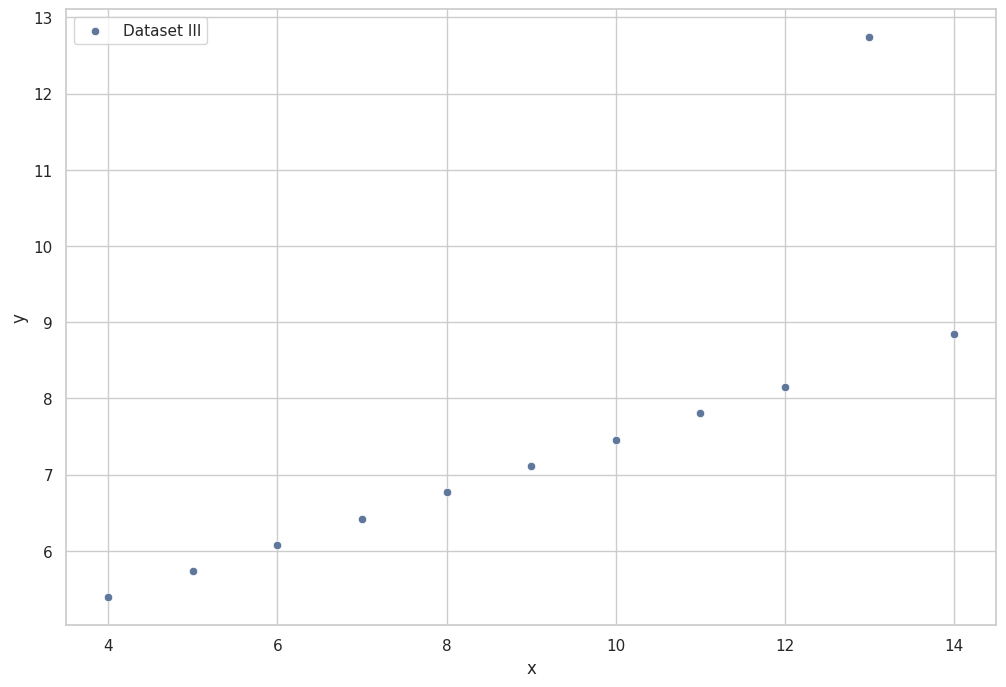

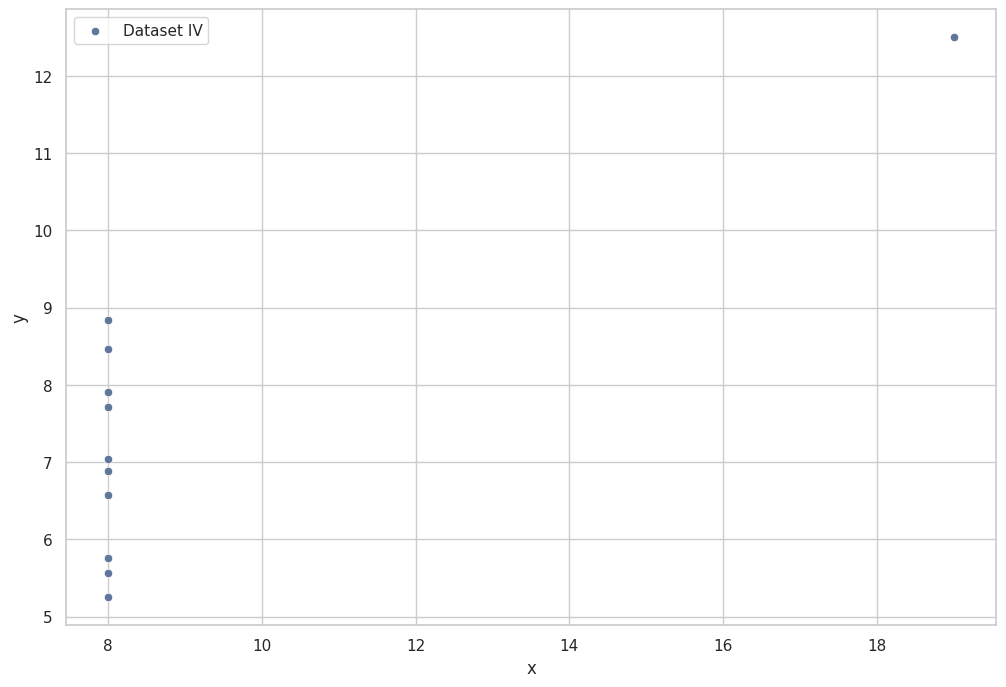

In [2]:
# Crear un gráfico de dispersión para cada conjunto de datos
subset_I = data[data['dataset'] == 'I']
subset_II = data[data['dataset'] == 'II']
subset_III = data[data['dataset'] == 'III']
subset_IV = data[data['dataset'] == 'IV']

sns.scatterplot(data=subset_I, x='x', y='y', label='Dataset I')
plt.show()
sns.scatterplot(data=subset_II, x='x', y='y', label='Dataset II')
plt.show()
sns.scatterplot(data=subset_III, x='x', y='y', label='Dataset III')
plt.show()
sns.scatterplot(data=subset_IV, x='x', y='y', label='Dataset IV')
plt.show()


Si, se pueden observar diferencias significativas en los grupos, en el primer grupo se puede observar un conjunto de datos que parecen crecer de forma lineal con una dispersion, en el segundo conjunto de datos se puede observar que los datos se ajustan mas a una cuadratica con $a<0$, el tercer conjunto de datos parece mas una recta con pendiente positiva, pero tiene un dato aislado que se aleja mucho de la tendencia y en el cuarto conjunto de datos se obsserva que los datos se agrupan de forma vertical, tambien con un dato aislado que se aleja bastante del resto de datos.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
data.groupby('dataset').describe()


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

en primera instancia se puede observar que todos poseen la misma cantidad de datos y ademas coiniciden en promedio y desviacion estandar, sin embargo si analizamos las estadisticas de cada dataset por separado podemos obsservar diferentes comportamientos en base a los cuartiles y los maximos y minimos.
Para el primero en base a los cuartiles podriamos inferir que se trata de una relacion lineal, para el segundo si nos fijamos especificamente en la variable $y$, y en los cuartiles y rangos maximos y minimos podemos ver que indica un comportamiento no lineal, para el tercero si nos fijamos en el maximo y en los cuartiles de la variable $y$ podriamos inferir que la muestra posee un outlier, finalmente para el cuarto dataset, esta vez mirand la variable $x$ en base al maximo y los cuartiles podemos inferir que hay un outlier respecto a esta variable.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Dataset: I
Error cuadrático medio (MSE): 1.2511536363636366
Coeficiente de determinación (R²): 0.6665424595087748


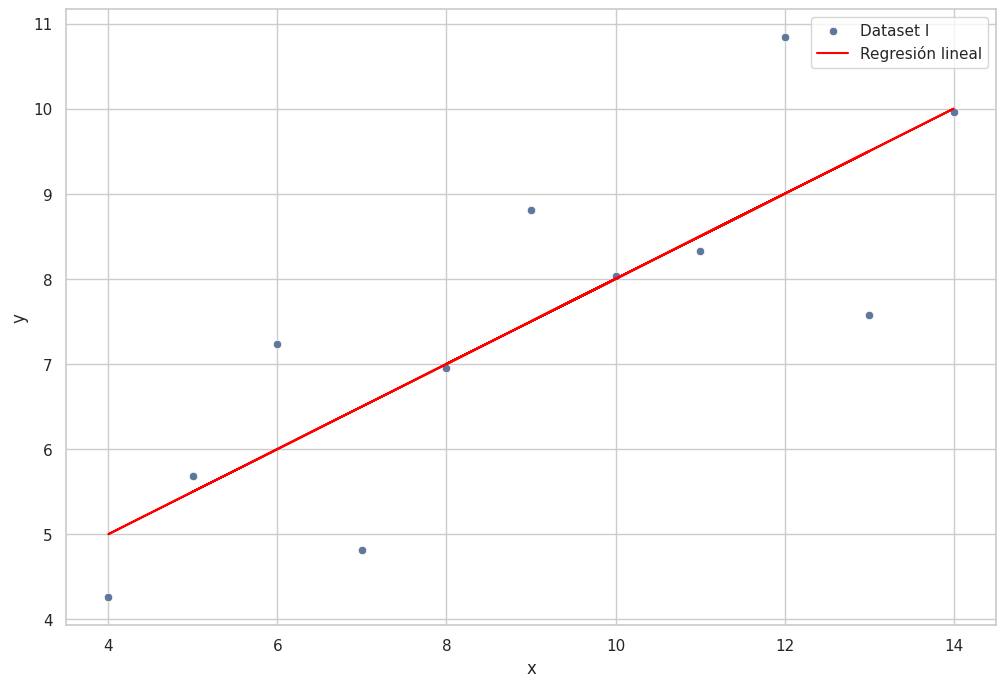

------------------------------
Dataset: II
Error cuadrático medio (MSE): 1.2523900826446281
Coeficiente de determinación (R²): 0.6662420337274844


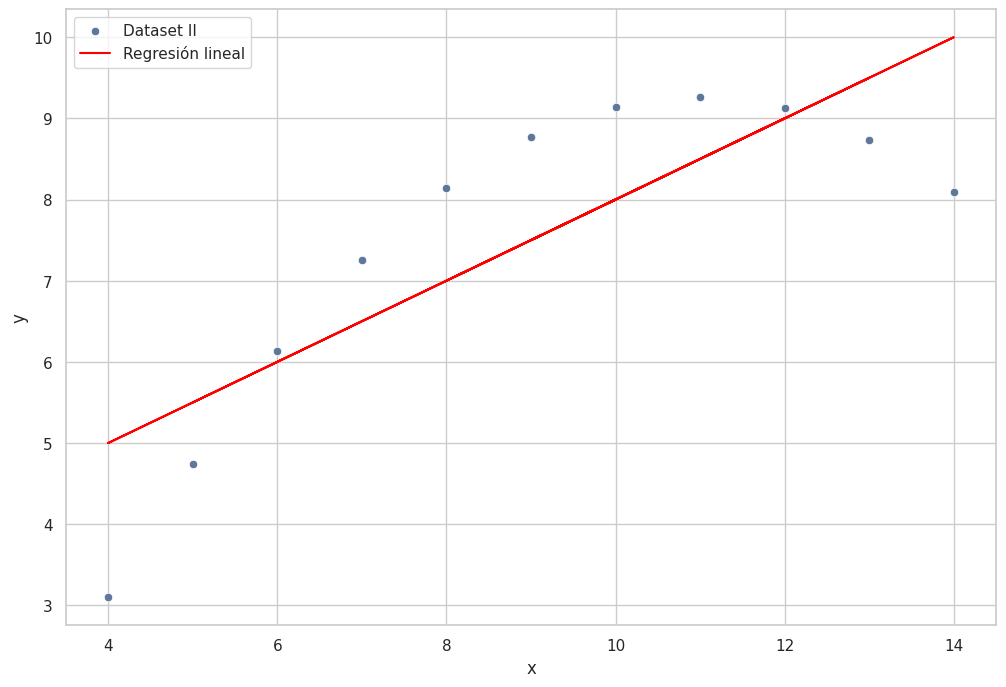

------------------------------
Dataset: III
Error cuadrático medio (MSE): 1.2505628925619836
Coeficiente de determinación (R²): 0.6663240410665592


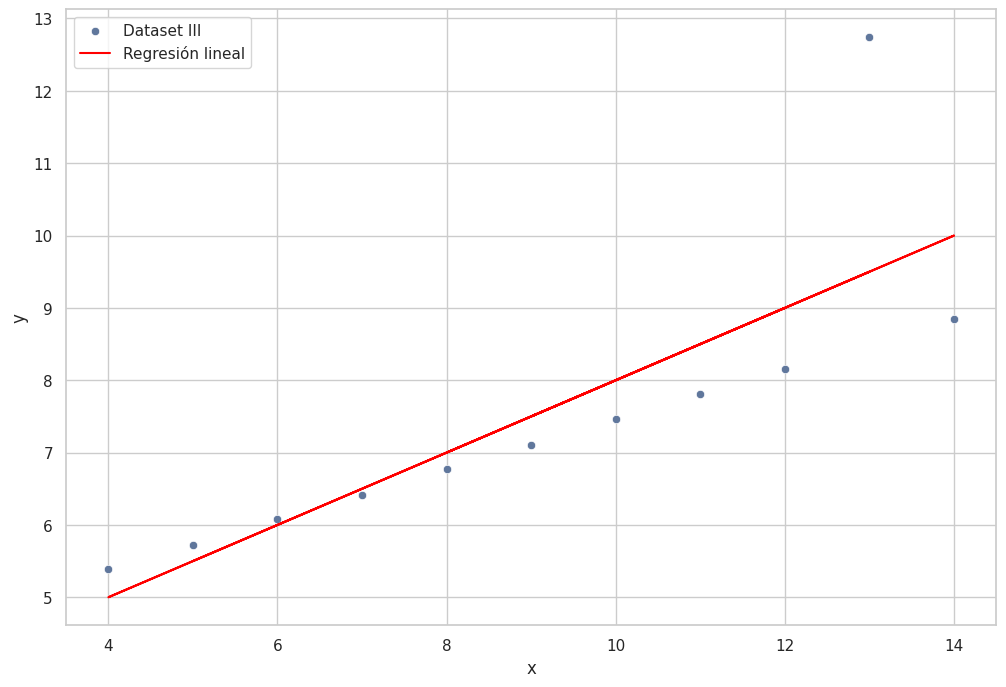

------------------------------
Dataset: IV
Error cuadrático medio (MSE): 1.249317272727273
Coeficiente de determinación (R²): 0.6667072568984653


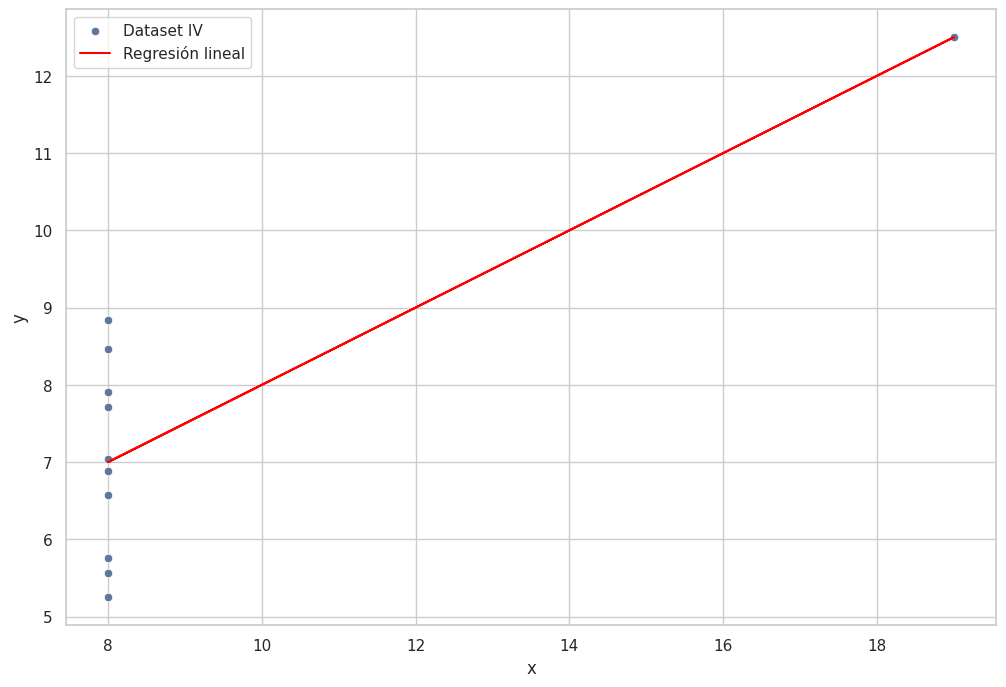

------------------------------


In [4]:
for dataset_name in data['dataset'].unique():
    subset = data[data['dataset'] == dataset_name]
    x = subset[['x']]
    y = subset['y']

    regresion = LinearRegression()
    regresion.fit(x, y)
    y_pred = regresion.predict(x)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Dataset: {dataset_name}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R²): {r2}")
    sns.scatterplot(data=subset, x='x', y='y', label=f'Dataset {dataset_name}')
    plt.plot(x, y_pred, color='red', label='Regresión lineal')
    plt.legend()
    plt.show()
    print("-" * 30)

Notamos que a pesar de la diferencia grafica de los datos el MSE y $R^2$ son bastante similares ya que difiere desde el tercer decimal sin embargo si nos fijamos en $R^2$ podemos decir que el ajuste lineal representa al rededor del 67% de los datos, sin embargo si miramos los graficos con el ajuste podemos notar que para el primero segundo y tercero la recta se ajusta relativamente bien, sin embargo para el segundo pareceria mejor idea una cuadratica, en el tercero la recta se aleja por el outlier que presenta a final y para el cuarto podemos notar que el ajuste lineal difiere mucho de los datos

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

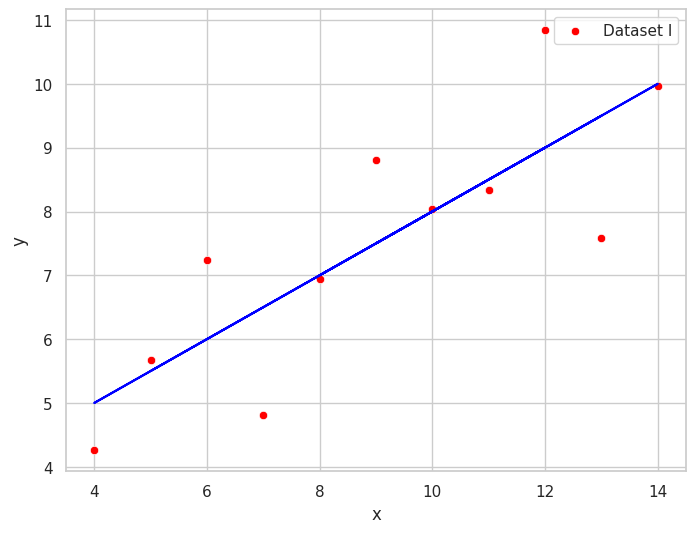

In [5]:
#para el primero el ajuste lineal esta bien
x= subset_I['x']
y= subset_I['y']
regresion = LinearRegression()
regresion.fit(x.values.reshape(-1, 1), y)
y_pred = regresion.predict(x.values.reshape(-1, 1))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, label=f'Dataset I', color='red')
plt.plot(x, y_pred, color='blue', label='Regresión lineal')
plt.show()


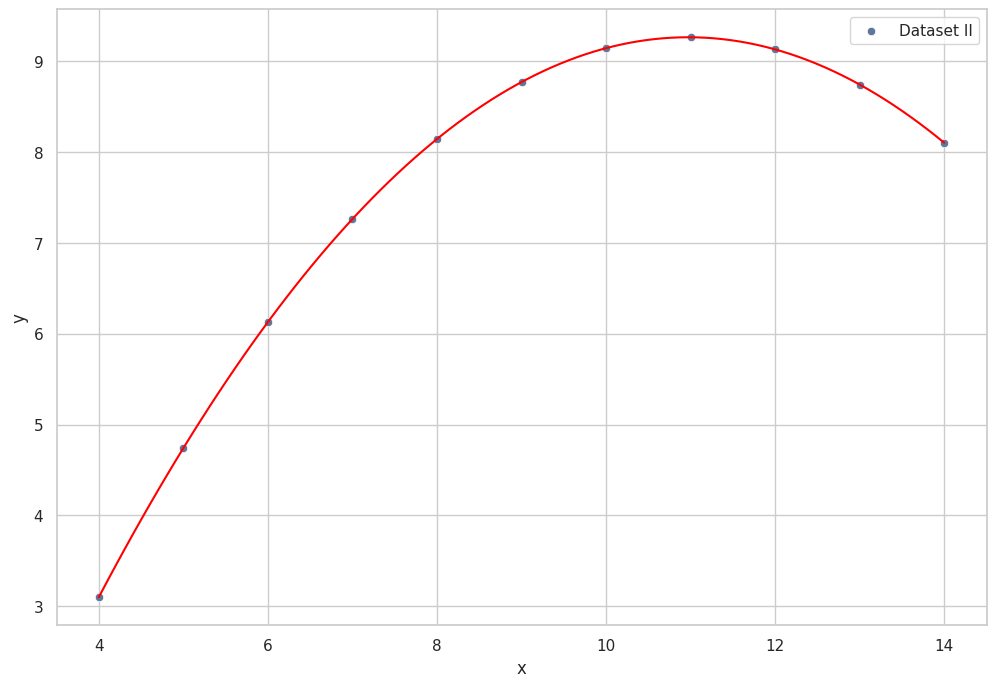

In [6]:
#para el segundo es mejor hacer un ajuste cuadratico
x= subset_II['x']
y= subset_II['y']
coefs = np.polyfit(x, y, 2)
poly_model = np.poly1d(coefs)
sns.scatterplot(x=x, y=y, label=f'Dataset II')
x_plot = np.linspace(x.min(), x.max(), 100)
y_plot = poly_model(x_plot)
plt.plot(x_plot, y_plot, color='red')
y_pred = poly_model(x)
plt.show()

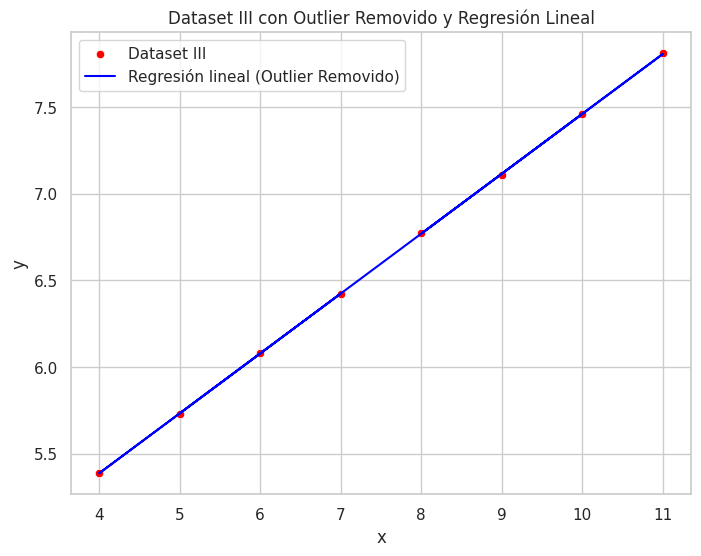

In [7]:
#Para el tercero basta eliminar el outlier y hacer el ajuste lineal sin el
subset_III_nuevo = subset_III[subset_III['x'] <= 11]
x = subset_III_nuevo['x']
y = subset_III_nuevo['y']
regresion = LinearRegression()
regresion.fit(x.values.reshape(-1, 1), y)
y_pred = regresion.predict(x.values.reshape(-1, 1))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, label=f'Dataset III', color='red')
plt.plot(x, y_pred, color='blue', label='Regresión lineal (Outlier Removido)')
plt.legend()
plt.title('Dataset III con Outlier Removido y Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

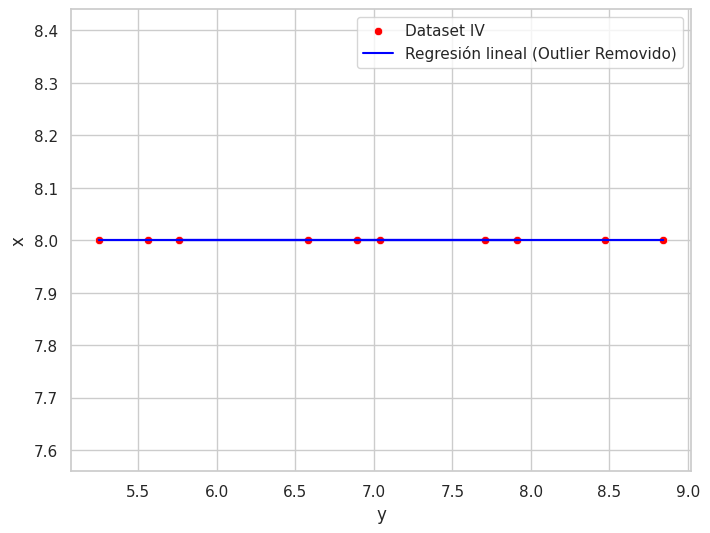

In [8]:
#para el cuarto invertiremos los ejes y eliminaremos el outlier y haremos un ajuste lineal
susbet_IV_nuevo = subset_IV[subset_IV['x'] <= 10]
x = susbet_IV_nuevo['y']
y = susbet_IV_nuevo['x']
regresion = LinearRegression()
regresion.fit(x.values.reshape(-1, 1), y)
y_pred = regresion.predict(x.values.reshape(-1, 1))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, label=f'Dataset IV', color='red')
plt.plot(x, y_pred, color='blue', label='Regresión lineal (Outlier Removido)')
plt.legend()
plt.show()
